# Voorbereiding eindopdracht

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

dataset = pd.read_csv('./dataset/dataset.csv')
dataset.head()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,6,8,3,1,1,8,1,2,8.746524,0
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,4,4,2,1,5,5,2,4,8.508448,1
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,4,3,2,1,8,7,2,4,5.701592,0
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,3,4,0,1,4,4,2,1,9.131087,0
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,9,4,0,1,2,9,5,3,2.286433,1


In [14]:
m = dataset.describe().round(2).transpose()


m['iqr'] = m['75%'] - m['25%']
m['range'] = m['max'] - m['min']
# modus
m['mode'] = dataset.mode().iloc[0].round(2)
m

,count,mean,std,min,25%,50%,75%,max,iqr,range,mode
Age,2000.0,38.70,12.07,18.00,28.00,39.00,49.00,59.00,21.00,41.00,43.00
Sleep_Hours,2000.0,6.50,2.02,3.00,4.76,6.54,8.24,9.99,3.48,6.99,3.00
Screen_Time,2000.0,6.40,3.14,1.00,3.71,6.31,9.11,12.00,5.40,11.00,1.00
Stress_Level,2000.0,4.99,2.63,1.00,3.00,5.00,7.00,9.00,4.00,8.00,9.00
Noise_Exposure,2000.0,2.05,1.43,0.00,1.00,2.00,3.00,4.00,2.00,4.00,4.00
Social_Interaction,2000.0,4.52,2.85,0.00,2.00,5.00,7.00,9.00,5.00,9.00,5.00
Work_Hours,2000.0,8.92,3.14,4.00,6.00,9.00,12.00,14.00,6.00,10.00,7.00
Exercise_Hours,2000.0,1.51,0.86,0.00,0.76,1.53,2.25,3.00,1.49,3.00,0.00
Caffeine_Intake,2000.0,1.96,1.43,0.00,1.00,2.00,3.00,4.00,2.00,4.00,0.00
Multitasking_Habit,2000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


# Maten

## Centrummaten

In [ ]:
# Gemiddelde berekenen
mean = dataset.mean().round(2)

# modus
mode = dataset.mode().iloc[0].round(2)

# mediaan
median = dataset.median().round(2)

# mean, mode en median in een tabel visueel weergeven
summary = pd.DataFrame({
    'mean': mean,
    'mode': mode,
    'median': median
})
summary

## Spreidingsmaten

In [ ]:
# range = max- min
range = (dataset.max() - dataset.min()).round(2)

# standaardafwijking
std = dataset.std().round(2)

# uitschieters
outliers = dataset[dataset > (dataset.mean() + 2 * dataset.std())].dropna(how='all')
# outliers => geen uitschieters

# IQR
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = (q3 - q1).round(2)

summary = pd.DataFrame({
    'range': range,
    'std': std,
    'IQR': iqr
})

summary

# Preprocessing

Preprocessing steps:
- 1. Controle op missende waarden.
        => Geen nullwaarden gevonden.
- 2. Controle op outliers.
        => Geen outliers gevonden.
- 3. Data normaliseren zodat alle waarden tussen 0 en 1 liggen.
        => Gedaan met Min-Max scaling.
- 4. Controle op feature colleratie.

In [ ]:
# 1 Missing values
null_values = dataset.isnull().sum()
null_values

In [ ]:
# 2 Outliers
outliers = dataset[dataset > (dataset.mean() + 2 * dataset.std())].dropna(how='all')
outliers

In [ ]:
# 3 Normaliseren
scaler = MinMaxScaler()
dataset[['Stress_Level','Noise_Exposure', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality']] = scaler.fit_transform(dataset[['Stress_Level','Noise_Exposure', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality']])
# show only those columns
dataset[['Stress_Level','Noise_Exposure', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality']].head()

In [ ]:
# 4 feature correlatie met heatmap
correlation = dataset.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='magma')
plt.show()

# Plotjes

De 4 zinvolle plots die ik ga maken zijn:
- 1. Violin plots voor ordinale data.
- 2. Pie chart voor nominale data.
- 3. Density plot voor continue data.
- 4. Histogram voor discrete data.
- 5. Heatmap van de correlatie (zie ook vorig deel)

In [ ]:
# 1 Violin plot
# voor stress level, noise exposure, anxiety score, depression score, sensory sensitivity, overthinking score, irritability score en sleep quality
features = [
    'Stress_Level', 'Noise_Exposure', 'Anxiety_Score', 'Depression_Score',
    'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality'
]

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(x=feature, data=dataset, color='lightblue', inner="quart")
    plt.title(feature.replace('_', ' '))

plt.subplots_adjust(wspace=0.5)
plt.show()


In [ ]:
# Controle van wat ja en nee is
# count = dataset['Multitasking_Habit'].value_counts()
# count = dataset['Meditation_Habit'].value_counts()
count = dataset['Overstimulated'].value_counts()

# 0 is no, 1 is yes
no = int(count[0])
yes = int(count[1])

no, yes

In [ ]:
# 2 Pie chart
# voor multitasking habit, meditation habit, overstimulated
features = ['Multitasking_Habit', 'Meditation_Habit', 'Overstimulated']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    dataset[feature].value_counts().reindex([0, 1]).plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=None)
    plt.title(feature.replace('_', ' '))
    title = feature.split('_')[0]
    plt.legend(['No', 'Yes'], loc='upper right', title=title)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
# 3 Density plot
# voor sleep hours, screen time, exercise hours, tech usage hours
features = ['Sleep_Hours', 'Screen_Time', 'Exercise_Hours', 'Tech_Usage_Hours']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=dataset, x=feature, hue='Overstimulated', fill=True, common_norm=False, palette=['lightblue', 'lightcoral'])
    plt.title(feature.replace('_', ' '))
    plt.legend(['Yes', 'No'], loc='upper right', title='Overstimulated')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
# 4 Histogram
# voor age, social interaction, work hours, caffeine intake, headache frequency
features = ['Age', 'Social_Interaction', 'Work_Hours', 'Caffeine_Intake', 'Headache_Frequency']
bins_list = [15, 10, 15, 5, 7]

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    bins = bins_list[i - 1]
    sns.histplot(data=dataset, x=feature, hue='Overstimulated', bins=bins, palette=['lightblue', 'lightcoral'], multiple='dodge')
    plt.title(feature.replace('_', ' '))
    plt.legend(['Yes', 'No'], loc='upper right', title='Overstimulated')

plt.subplots_adjust(wspace=0.5)
plt.show()

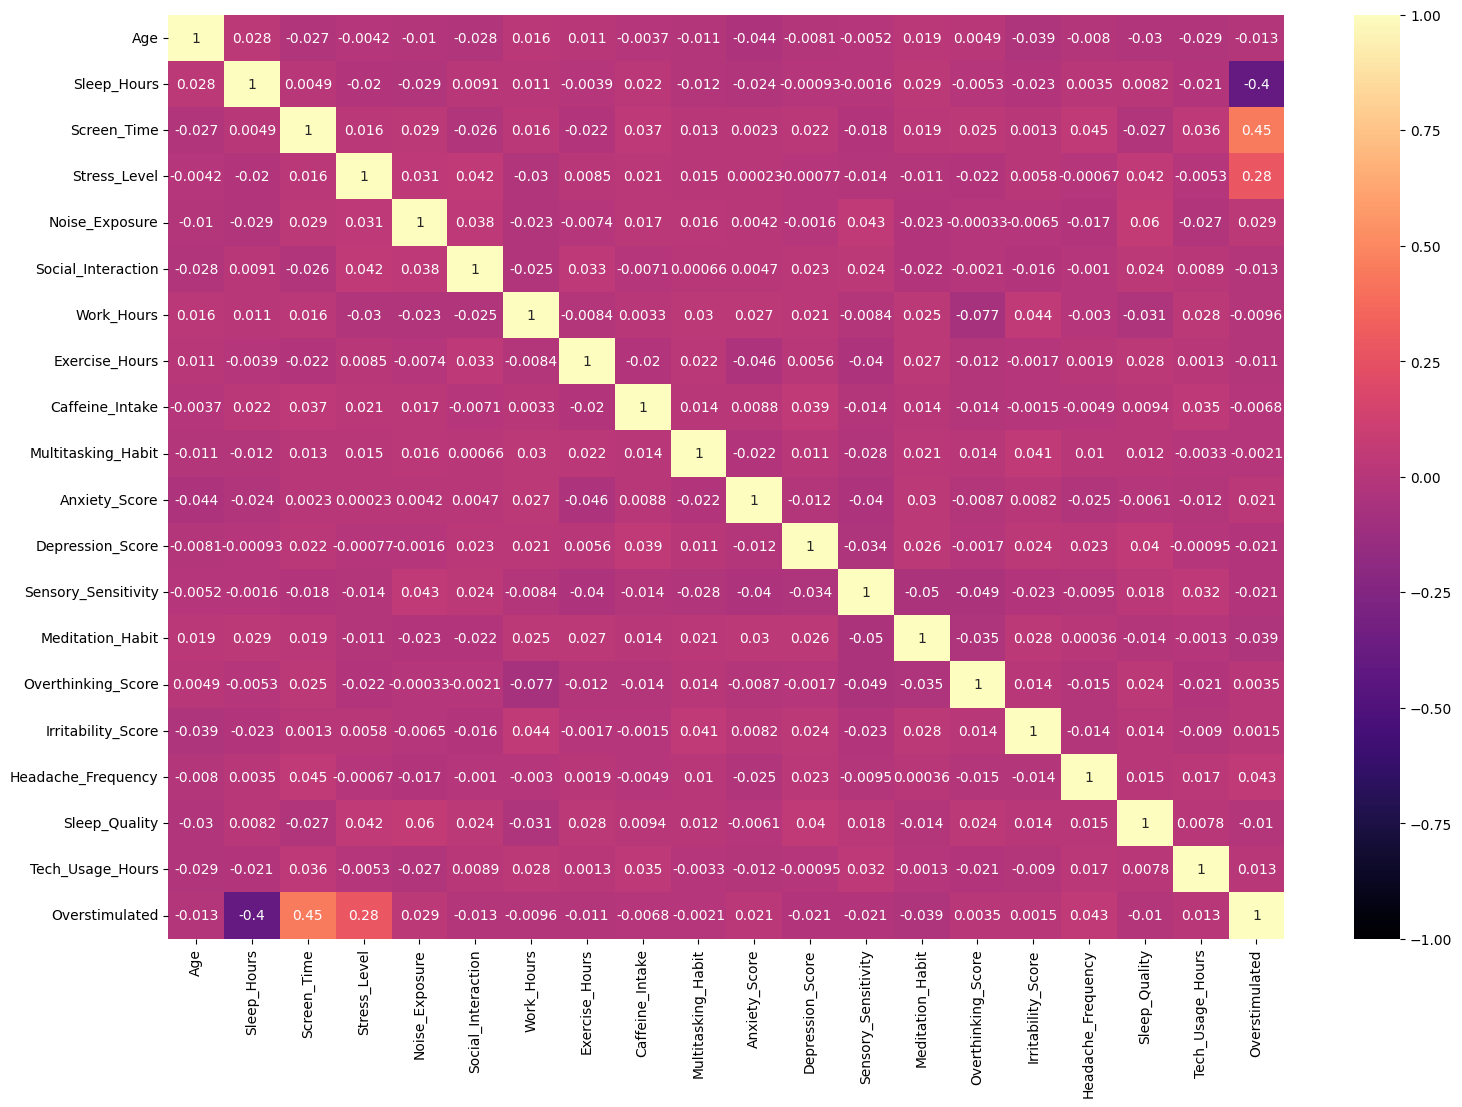

In [4]:
# 5 Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation = dataset.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='magma')
plt.show()

# Zoekopdrachten uitwerken

In [ ]:
# zoekopdracth 1: Van mijn leeftijdscategorie hoeveel zijn er overstimulated?
age = 21
rows_by_age = dataset.loc[dataset["Age"] == age]
total_by_age = int(rows_by_age["Age"].count())
overstimulated = rows_by_age.loc[rows_by_age["Overstimulated"] == 1]
total_overstimulated = int(overstimulated["Age"].count())

total_by_age, total_overstimulated
print(f"Of {total_by_age} people, {total_overstimulated} are overstimulated at the age {age}")

# Count overstimulated and not overstimulated
counts = rows_by_age["Overstimulated"].value_counts().sort_index()

# Convert 0/1 to labels for the x-axis
labels = ['No', 'Yes']
values = [counts.get(0, 0), counts.get(1, 0)]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['lightcoral', 'lightgreen'], alpha=0.8)

# Title and labels
plt.title(f"Overstimulation at Age {age}")
plt.xlabel("Overstimulated")
plt.ylabel("Number of People")
plt.grid(axis='y', alpha=0.6)

# Optional: Add number labels on top of bars
plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height(), str(int(bars[0].get_height())), ha='center', va='bottom')
plt.text(bars[1].get_x() + bars[1].get_width() / 2, bars[1].get_height(), str(int(bars[1].get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()




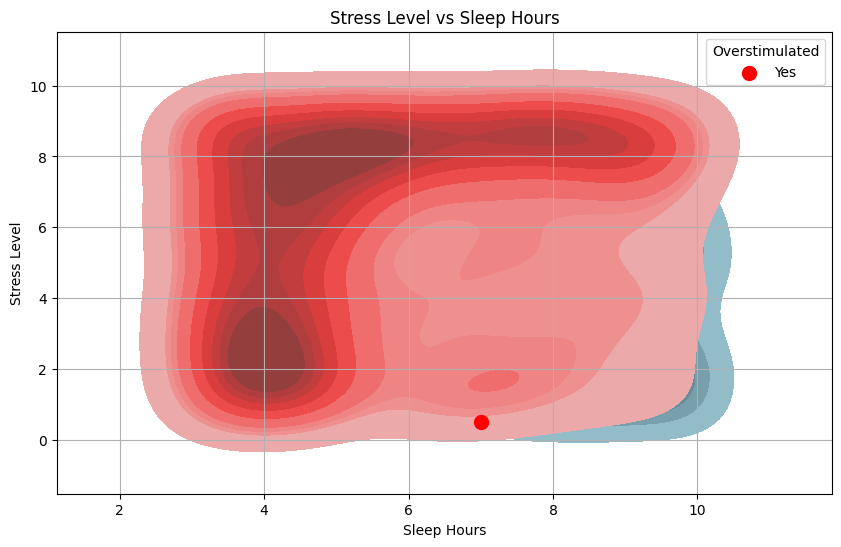

In [ ]:
# Zoekopdracht 2: Hoe gestressed zijn mensen die wel of niet overstimulated zijn en x aantal uur slapen?
# plot distribution of stress level (y-axis) based on sleep hours (x-axis)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
# plot distribution of stress level (y-axis) based on sleep hours (x-axis)
sleep_hours = 7
overstimulated = 1

df = dataset.copy()
df['Stress_Level'] = df['Stress_Level'].astype(float)
df['Sleep_Hours'] = df['Sleep_Hours'].astype(float)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Sleep_Hours', y='Stress_Level', hue='Overstimulated', fill=True, common_norm=False, palette=['lightblue', 'lightcoral'])

# add a dot at sleep_hours of 7 and stress level of 0.5
plt.scatter(sleep_hours, 0.5, color='red', s=100, label='Sleep Hours = 7, Stress Level = 0.5', zorder=5)
plt.title('Stress Level vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.legend(['Yes', 'No'], loc='upper right', title='Overstimulated')
plt.grid(True)
plt.show()




C:\Users\vinni\AppData\Local\Temp\ipykernel_10000\3318945493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep_Hours'] = df['Sleep_Hours'].round(0)


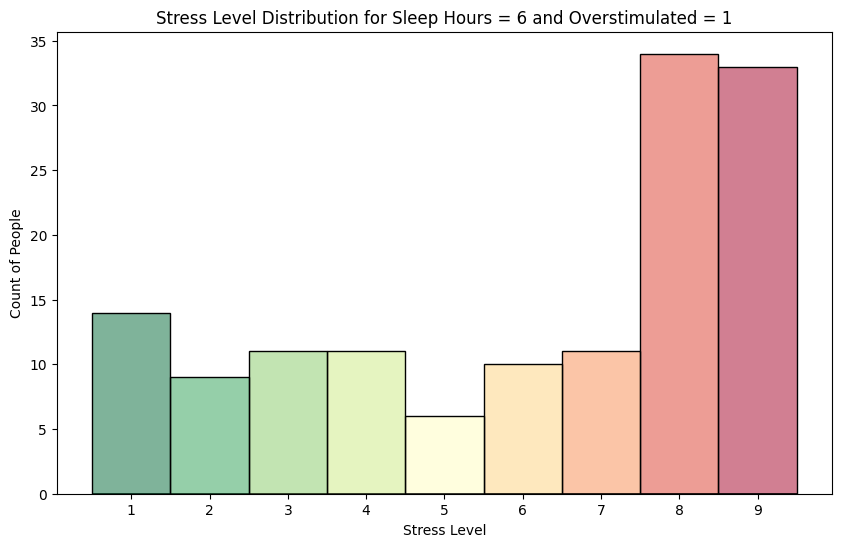

In [3]:
sleep_hours = 6
overstimulated = 1

# filter dataset for overstimulated
df = dataset[dataset['Overstimulated'] == overstimulated]

# round sleephours to nearest integer
df['Sleep_Hours'] = df['Sleep_Hours'].round(0)

# filter on sleep_hours
df = df[df['Sleep_Hours'] == sleep_hours]

# y-axis is count of people and x-axis is stress level
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Stress_Level', bins=8, color='lightblue', discrete=True, hue='Stress_Level', palette='RdYlGn_r')
# disable legend
plt.legend([], [], frameon=False)
plt.xticks(ticks=range(1, 10), labels=range(1, 10))
plt.title(f'Stress Level Distribution for Sleep Hours = {sleep_hours} and Overstimulated = {overstimulated}')
plt.xlabel('Stress Level')
plt.ylabel('Count of People')
plt.show()



C:\Users\vinni\AppData\Local\Temp\ipykernel_10000\2652341120.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_Time'] = df['Screen_Time'].round(0)


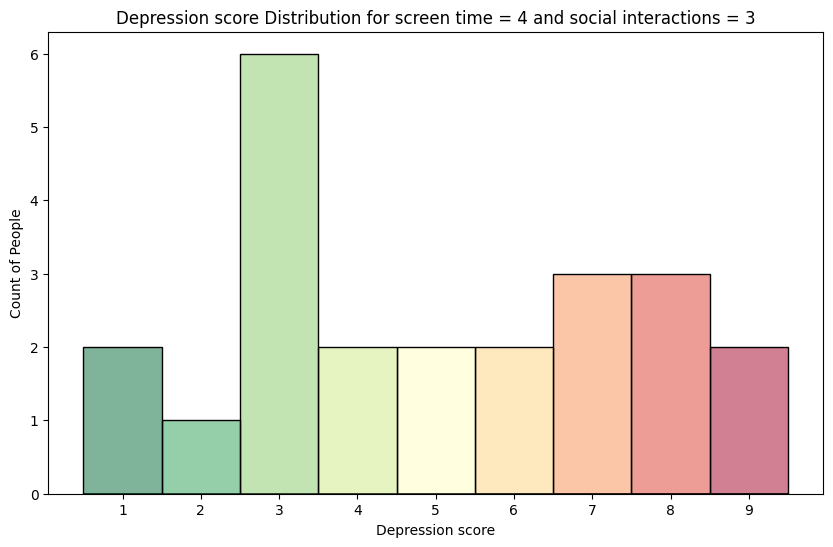

In [45]:
# What could be the depression score depending on amount of social interactions and screen time?
screen_time = 4
social_interaction = 3

# copy df
df = dataset.copy()

# filter dataset for social interaction
df = dataset[dataset['Social_Interaction'] == social_interaction]

# round screen time to nearest integer
df['Screen_Time'] = df['Screen_Time'].round(0)

# filter on screen time
df = df[df['Screen_Time'] == screen_time]

# y-axis is count of people and x-axis is stress level
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Depression_Score', bins=8, color='lightblue', discrete=True, hue='Depression_Score', palette='RdYlGn_r')
# disable legend
plt.legend([], [], frameon=False)
plt.xticks(ticks=range(1, 10), labels=range(1, 10))
plt.title(f'Depression score Distribution for screen time = {screen_time} and social interactions = {social_interaction}')
plt.xlabel('Depression score')
plt.ylabel('Count of People')
plt.show()

C:\Users\vinni\AppData\Local\Temp\ipykernel_10000\2945654819.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exercise_Hours'] = df['Exercise_Hours'].apply(round_to_nearest_custom)


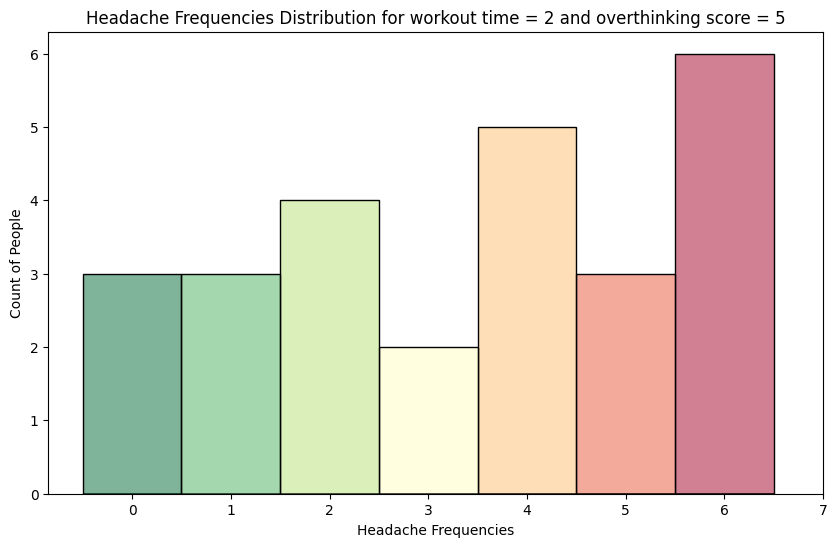

In [79]:
overthinking_score = 5
exercise_hours = 2

# copy df
df = dataset.copy()

# filter dataset for overthinking score
df = dataset[dataset['Overthinking_Score'] == overthinking_score]

# Define your allowed values (buckets)
rounding_buckets = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])

# Custom rounding function
def round_to_nearest_custom(x):
    return rounding_buckets[np.abs(rounding_buckets - x).argmin()]

# Round workout time to nearest custom value
df['Exercise_Hours'] = df['Exercise_Hours'].apply(round_to_nearest_custom)

# filter on workout time
df = df[df['Exercise_Hours'] == exercise_hours]

# y-axis is count of people and x-axis is stress level
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Headache_Frequency', bins=8, color='lightblue', discrete=True, hue='Headache_Frequency', palette='RdYlGn_r')
# disable legend
plt.legend([], [], frameon=False)
plt.xticks(ticks=range(0, 8), labels=range(0, 8))
plt.title(f'Headache Frequencies Distribution for workout time = {exercise_hours} and overthinking score = {overthinking_score}')
plt.xlabel('Headache Frequencies')
plt.ylabel('Count of People')
plt.show()